Kotlyarov Nickolay, 308 group

    Данный отсчет раскрывает характер и особенности задержек авиарейсов. 
    Отчет должен помогать руководству аэропортов увидеть проблемные точки и способствовать принятию решений.

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url1, sep=',', index_col=0)
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
dw = pd.read_csv(url2, sep=',', index_col=0)
dweek = df

In [103]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [104]:
dw.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


1.Исследуем среднее время задержки по месяцам

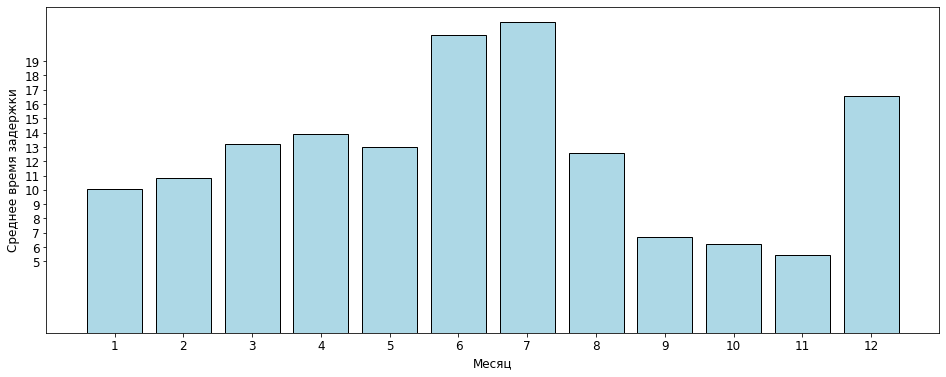

In [153]:
grouped_data = pd.DataFrame(df.groupby([df.month])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (16, 6))
plt.bar(grouped_data.month, grouped_data.mean_delay_dep, color='lightblue', edgecolor = 'black')
plt.xticks(range(1, 13))
plt.yticks(range(5, 20))
plt.ylabel('Среднее время задержки')
plt.xlabel('Месяц')
plt.show()

Мы можем наблюдать естественную закономерность: в самые жаркие времена года самая большая средняя задержка, на втором месте идет декабрь самый праздничный месяц (люди перед новым годом спешат куда-то), поэтому естественно нужно увеличивать число рейсов в эти периоды, дабы снизить нагрузку на пилотов.

2.Рассмотрим среднее время задержки по дням в неделе

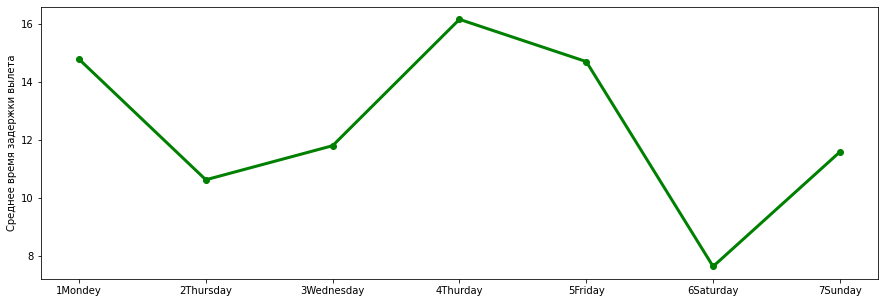

In [111]:
dweek['Date'] = dweek['year'].astype(str) + '-' + dweek['month'].astype(str) + '-' + dweek['day'].astype(str)
dweek['Date'] = pd.to_datetime(dweek['Date'])
dweek['day_w'] = dweek['Date'].dt.dayofweek
days = ["1Mondey","2Thursday", "3Wednesday", "4Thurday","5Friday", "6Saturday", "7Sunday"]
dweek['day_w'] = dweek['day_w'].apply(lambda x: days[x])
grouped_data = pd.DataFrame(dweek.groupby([dweek.day_w])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (15, 5))
plt.plot(grouped_data.day_w, grouped_data.mean_delay_dep, '-o', c='green', linewidth=3)
plt.xticks(range(0, 7))
plt.ylabel('Среднее время задержки вылета')
plt.xlabel('')
plt.show()


Как видно из графика, самый проблемным днем является четверг и пятница, что неудивительно, ведь перед выходными люди обычно совершают перелеты.

3.А как ведет себя среднее время задержки по часам в период дня? Исследуем эту картину

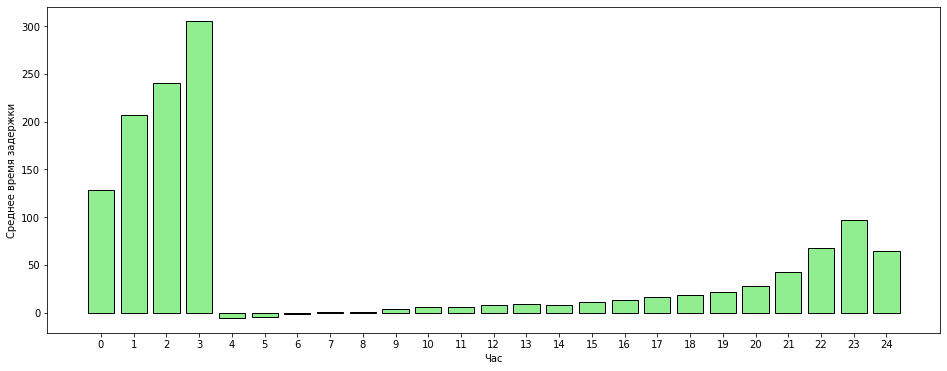

In [107]:
grouped_data = pd.DataFrame(df.groupby([df.hour])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
plt.figure(figsize = (16, 6))
plt.bar(grouped_data.hour, grouped_data.mean_delay_dep, color='lightgreen', edgecolor = 'black')
plt.xticks(range(0, 25))
plt.ylabel('Среднее время задержки')
plt.xlabel('Час')
plt.show()

Мы видим, что самое проблемное время находится в диапазоне с 23.00 до 03.00, то есть ночные рейсы.

4.Сколько какие авиокомпании в среднем имеют задержки?

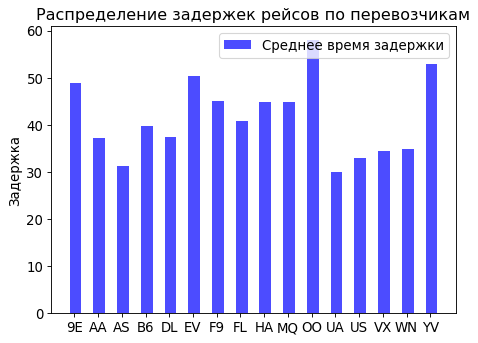

In [144]:
df5=dfNew[['carrier', 'dep_delay']]
df5 = df5[df5['dep_delay'] > 0]
v5 = df5.groupby('carrier').mean()
a5 = np.array(v5['dep_delay'])
v5.head()
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (522 / dpi, 380 / dpi) )
plt.rcParams.update({'font.size': 12})
plt.title('Распределение задержек рейсов по перевозчикам')
xs = range(len(v5.index))
plt.bar([x + 0.05 for x in xs], [t*1 for t in a5], width = 0.5, color = 'blue', alpha = 0.7, label = 'Среднее время задержки')
plt.xticks(xs, v5.index)
plt.ylabel('Задержка')
plt.legend(loc='upper right')
fig.savefig('bars.png')

Как видно самую большую задержку предоставляет авиакомпания OO <br/>А самые маленькие задержки авиакомпании UA, AS,US

5.Определим среднее время задержки по аэропортам

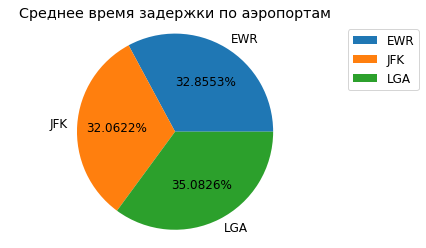

In [171]:
v1 = df4.groupby('origin').mean()
d = np.array(v1['dep_delay'])
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(d, labels=v1.index, autopct='%1.4f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Среднее время задержки по аэропортам')
plt.show()

Отсюда видно, что LGA стоит получше задуматься об экономии времени своим клиентам.

6.Рассмотрим зависимость задержек от места прибытия и числа рейсов, тем самым выявив наиболее удобные города для перелетов

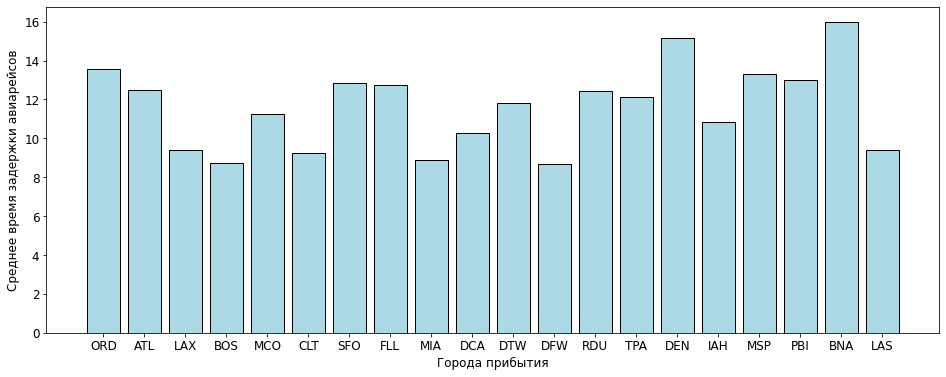

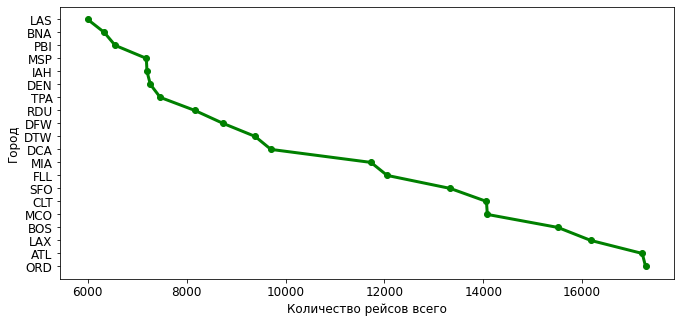

In [179]:
grouped_data1 = pd.DataFrame(df.groupby([df.dest]).size().reset_index(name='count_of_flights'))
df_sorted = grouped_data1.sort_values("count_of_flights", ascending=False)
df_sorted_top = df_sorted.head(20)
grouped_data2 = pd.DataFrame(df_fly.groupby([df_fly.dest])['dep_delay'].mean().reset_index(name='mean_delay_dep'))
df_dest_merged = pd.merge(df_sorted_top, grouped_data2, on=['dest'])

plt.figure(figsize = (16, 6))
plt.bar(df_dest_merged.dest, df_dest_merged.mean_delay_dep, color='lightblue', edgecolor = 'black')
plt.ylabel('Среднее время задержки авиарейсов')
plt.xlabel('Города прибытия')
plt.show()

plt.figure(figsize = (11, 5))
plt.plot(df_dest_merged.count_of_flights, df_dest_merged.dest, '-o', c='green', linewidth=3)
plt.ylabel('Город')
plt.xlabel('Количество рейсов всего')
plt.show()

Как видно из этих графиков, Лас-Вегас (LAS) является лидирующем в этом деле, туда летит больше всего людей, и время задержки является одним из наименьших.
<br/>А вот в BNA также много рейсов, но вот среднее время задержки туда больше чем в LAS примерно на 7 минут!
<br/>Города BOS и MIA имеют наименьшее и примерно равное время задержек

7.Исследуем зависимость времени задержки от расстояния полета

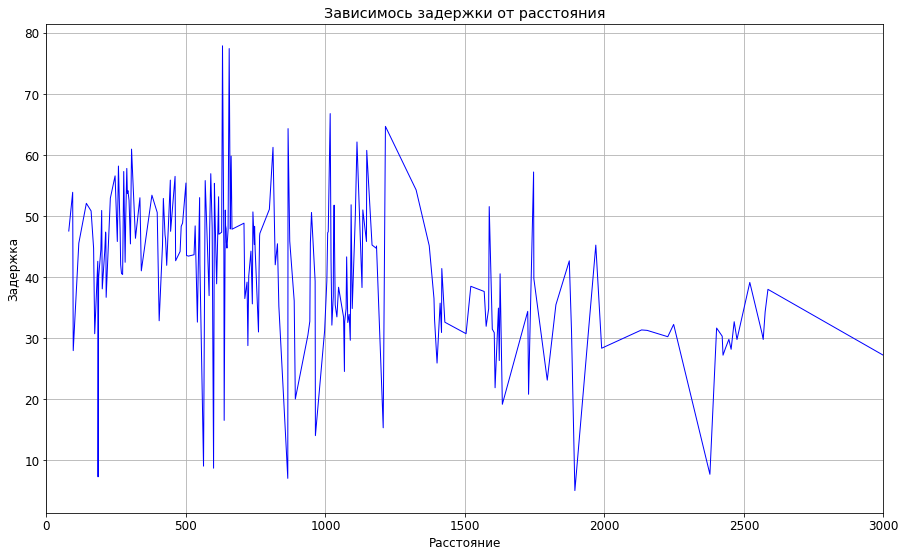

In [173]:
dfNew = df.copy()
dK=dfNew[['dep_delay','distance']]
dK = dK[dK['dep_delay'] > 0]
dK = dK.groupby('distance').mean()
A = np.array(dK['dep_delay'])
d6 = dK.index
plt.figure(figsize = (15, 9))
plt.plot(d6, A, lw = 1, color = 'blue')
plt.title('Зависимось задержки от расстояния')
plt.xlabel('Расстояние')
plt.ylabel('Задержка')
plt.xlim(0, 3000)
grid1 = plt.grid(True)
plt.show()


Из данного графика можем заключить, что рейсы на длинные расстояния редко сопровождаются большой задержкой. А многие перелеты на небольшие дистанции часто имеют довольно большую задержку.

8.Исследуем время средней задержки от температуры в этот день

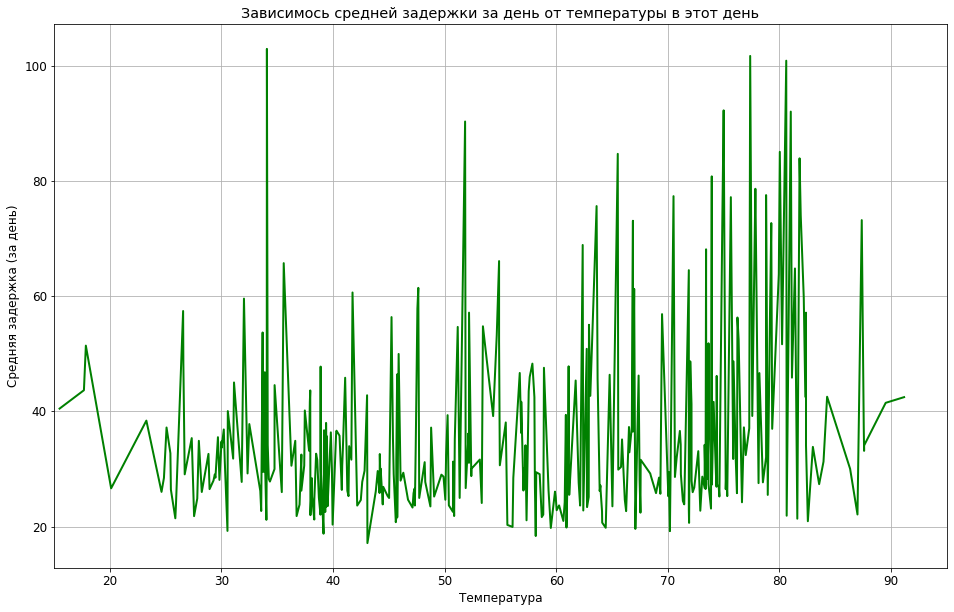

In [174]:
dL=dfNew[['dep_delay', 'year','month','day']]
dL = dL[dL['dep_delay'] > 0]
dL = dL.groupby([dL.year, dL.month, dL.day]).mean()
df1_1 = dw[['temp', 'year' ,'month','day']]
df1_1 = df1_1.groupby([df1_1.year, df1_1.month , df1_1.day]).mean()
mt = pd.merge(dL, df1_1, on = ['year','month','day'])
mt = mt.sort_values(by = 'temp')
amt = np.array(mt['dep_delay'])
bmt = np.array(mt['temp'])
plt.figure(figsize = (16, 10))
plt.plot(bmt, amt, lw = 2, color = 'green')
plt.title('Зависимось средней задержки за день от температуры в этот день')
plt.xlabel('Температура')
plt.ylabel('Средняя задержка (за день)')
plt.xlim(15, 95)
grid1 = plt.grid(True)
plt.show()


Отталкиваясь от данного графика, можем заключить, что чем жарче день, тем больше по времени средняя задержка, что неудивительно. Поэтому на самый жаркий период дня, руководству аэропорта следует обратить внимание на увеличение количества обслуживающего персонала.

9.Рассмотрим влияние скорости ветра на время задержки

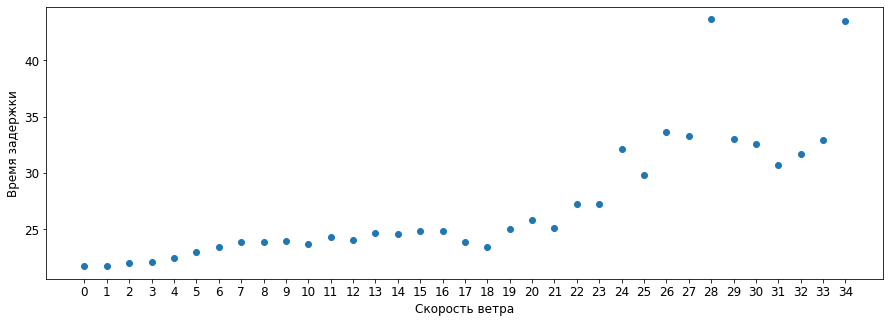

In [176]:
fw = df.groupby(['month','day', 'hour'])['dep_delay'].mean()
ww = dw.groupby(['month','day', 'hour'])['wind_speed'].mean()
fw = pd.merge(fw, ww, on = ['month', 'day', 'hour'])
fw = fw.sort_values(by=['wind_speed'], ascending=False)
fw = fw.dropna(subset = ['wind_speed', 'dep_delay'])
fw = fw.abs()
Velocity = []
Time = []
for i in range (35):
    Velocity.append(fw.loc[((fw['wind_speed']<i+10) & (fw['wind_speed'] > i))].mean()[0])
    Time.append(str(i))
    
plt.figure(figsize=(15, 5))
plt.scatter(Time, Velocity)
plt.ylabel('Время задержки')
plt.xlabel('Скорость ветра')
plt.show()

Мы видим, что если скорость ветра больше 18м/сек, то задержка начинает постепенно увеличиваться, что соответствует правде, ведь такие порывы воздушных масс могут вызвать опасный крен самолёта.

10.Рассмотрим зависимость задержки рейсов от давления и влажности

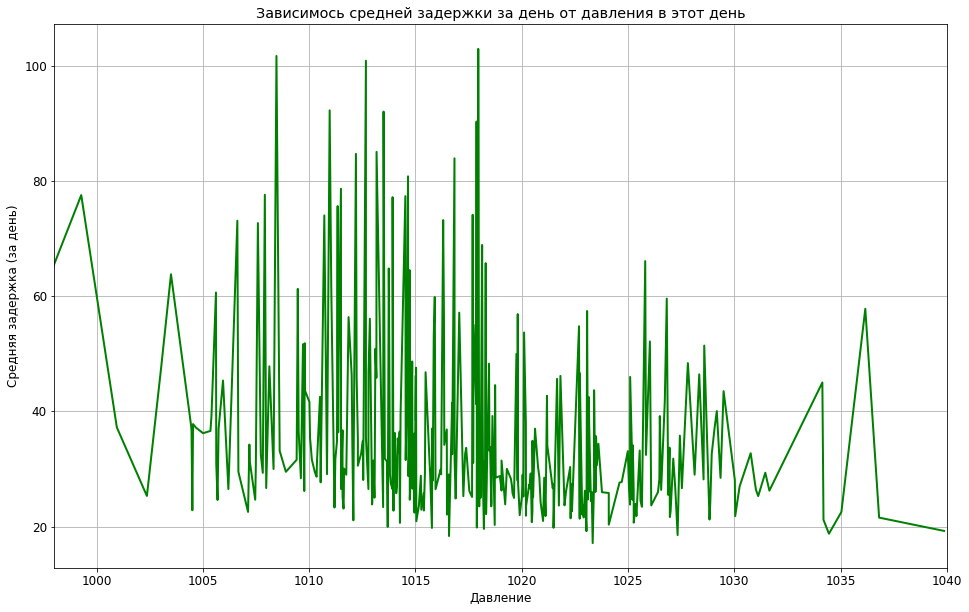

In [208]:
dD = dw[['pressure', 'year' ,'month','day']]
dD = dD.groupby([dD.year, dD.month , dD.day]).mean()

df15=dfNew[['dep_delay', 'year','month','day']]
df15 = df15[df15['dep_delay'] > 0]
df15 = df15.groupby([df15.year, df15.month, df15.day]).mean()

mt5 = pd.merge(df15, dD, on = ['year','month','day']).sort_values(by = 'pressure')
a15 = np.array(mt5['dep_delay'])
b15 = np.array(mt5['pressure'])


plt.figure(figsize = (16, 10))
plt.plot(b15, a15, lw = 2, color = 'green')
plt.title('Зависимось средней задержки за день от давления в этот день')
plt.xlabel('Давление')
plt.ylabel('Средняя задержка (за день)')
plt.xlim(998, 1040)
grid1 = plt.grid(True)
plt.show()


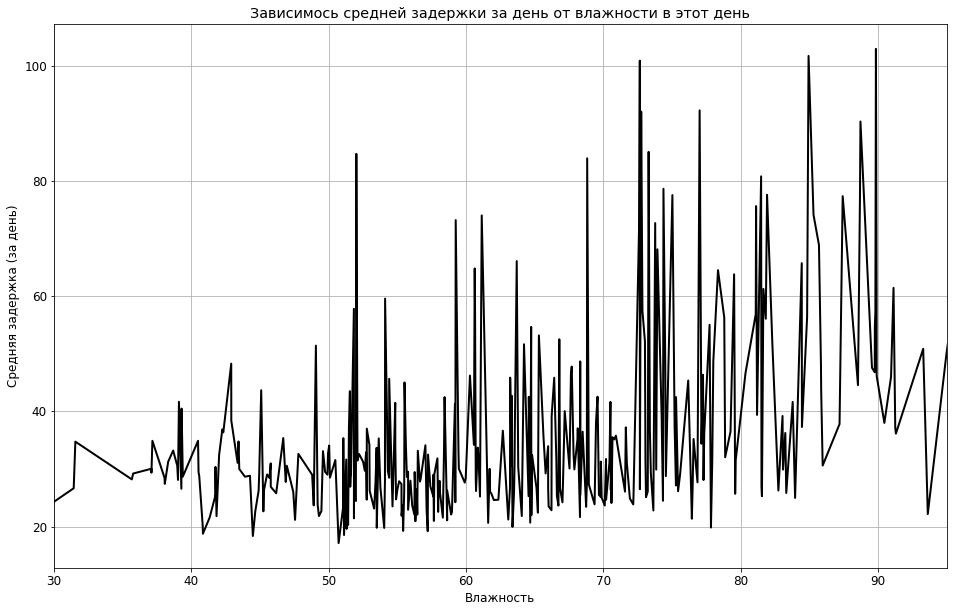

In [239]:
dH = dw[['humid', 'year' ,'month','day']]
dH = dH.groupby([dH.year, dH.month , dH.day]).mean()
df15=dfNew[['dep_delay', 'year','month','day']]
df15 = df15[df15['dep_delay'] > 0]
df15 = df15.groupby([df15.year, df15.month, df15.day]).mean()

mt5 = pd.merge(df15, dH, on = ['year','month','day']).sort_values(by = 'humid')
A15 = np.array(mt5['dep_delay'])
b15 = np.array(mt5['humid'])
plt.figure(figsize = (16, 10))
plt.plot(b15, A15, lw = 2, color = 'black')
plt.title('Зависимось средней задержки за день от влажности в этот день')
plt.xlabel('Влажность')
plt.ylabel('Средняя задержка (за день)')
plt.xlim(30, 95)
grid1 = plt.grid(True)
plt.show()

Судя из данных этих графиков, можно сказать, что давление особо никак не зависит на задержку, а вот при увеличении влажности воздуха задержка в среднем ничинает расти, так как скорее всего при большой влажности сильно затрудняеся видимость

11.А что насчет видимости? Изучим этот вопрос

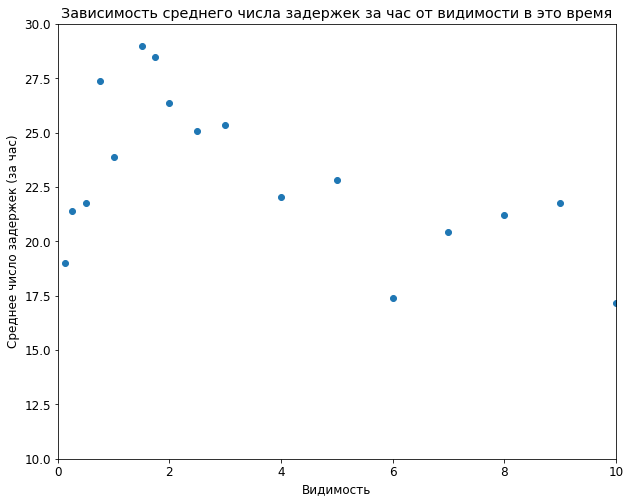

In [234]:
df11=dfNew[['dep_delay', 'year','month','day','hour']]
df11 = df11[df11['dep_delay'] > 0]
df11 = pd.DataFrame(df11.groupby([df11.year, df11.month, df11.day, df11.hour])['dep_delay'].size().reset_index(name='Count'))
df1_3 = dw[['visib', 'year' ,'month', 'day', 'hour']]
df1_3 = df1_3.groupby([df1_3.year, df1_3.month , df1_3.day, df1_3.hour]).mean()
df10.head()
df1_3.head(20)
mt3 = pd.merge(df10, df1_3, on = ['year','month','day', 'hour'])
mt3 = mt3.groupby(mt3.visib).mean()
amt3 = np.array(mt3['Count'])
bmt3 = np.array(mt3['visib'])
plt.figure(figsize = (10, 8))
plt.scatter(bmt3, amt3)
plt.xlim(0, 10)
plt.ylim(10, 30)
plt.ylabel('Среднее число задержек (за час)')
plt.xlabel('Видимость')
plt.title('Зависимость среднего числа задержек за час от видимости в это время')
plt.show()


Как легко видно из графика, при увеличении видимости, задержка уменьшается, что естественно

12.А как затрудняется видимость при увеличении влажности?

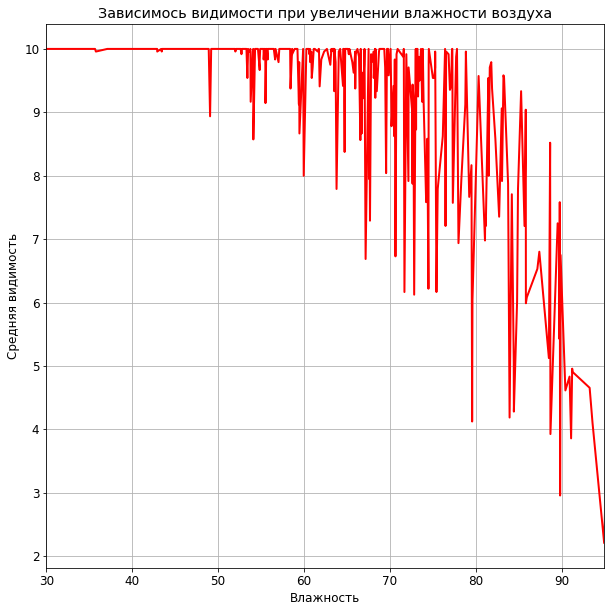

In [242]:
dH = dw[['humid', 'year' ,'month','day']]
dH = dH.groupby([dH.year, dH.month , dH.day]).mean()
df15=dw[['visib', 'year','month','day']]
df15 = df15[df15['visib'] > 0]
df15 = df15.groupby([df15.year, df15.month, df15.day]).mean()

mt5 = pd.merge(df15, dH, on = ['year','month','day']).sort_values(by = 'humid')
A15 = np.array(mt5['visib'])
b15 = np.array(mt5['humid'])
plt.figure(figsize = (10, 10))
plt.plot(b15, A15, lw = 2, color = 'red')
plt.title('Зависимось видимости при увеличении влажности воздуха')
plt.xlabel('Влажность')
plt.ylabel('Средняя видимость')
plt.xlim(30, 95)
grid1 = plt.grid(True)
plt.show()

Тем самым мы доказали догадку из вывода 10 пункта, что при большой влажности падает видимость и следоваетльно растет средняя задержка рейсов!